<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *AIB / SECTION 4 / SPRINT 1 / NOTE 1*

---

# N411. 퍼셉트론(Perceptron)과 인공신경망(Artificial Neural Networks)

## 퍼셉트론(Perceptron)이란 무엇일까요?


혹시 레고(Lego) 블록을 조립해보신 적이 있으신가요?

<img src="https://i.imgur.com/Kyzq40N.jpg" height="200">
<img src="https://i.imgur.com/aagVuqz.jpg" height="200">

레고는 유사하게 생긴 기본 블록을 계속 쌓아가면서 전체적인 형태를 만들어 나가게 되는데요.<br/>
우리가 앞으로 배울 신경망 역시 기본이 되는 구조를 겹겹이 쌓아 만들어집니다.<br/>
**신경망을 이루는 가장 기본 단위**인 **<font color='#ff6f61'>퍼셉트론(Perceptron)</font>**에 대해서 알아보겠습니다.

퍼셉트론은 **<font color='#ff6f61'>다수의 신호를 입력으로 받아 하나의 신호를 출력</font>**하는 구조입니다.<br/>
아래 그림은 퍼셉트론을 도식화하여 나타낸 이미지입니다.

<img src="https://i.imgur.com/EtpSmaG.png" width="600">

- 위 그림에서 볼 수 있는 것처럼 **퍼셉트론은 크게 두 부분으로 나눌 수 있습니다.**

1. **<font color='#ff6f61'>가중치(Weight)-편향(bias) 연산</font>**<br/>
위에서 알아본 것처럼 퍼셉트론은 여러 개의 신호를 입력받습니다.<br/>
입력된 신호는 각각의 가중치와 곱해지고 그 결과를 더해주게 되는데요.<br/>
이러한 **가중합(Weighted Sum)**이 퍼셉트론의 첫 번째 단계입니다.

    간단한 예시 코드를 통해 가중합이 어떻게 일어나는지 알아보겠습니다.

In [2]:
import numpy as np

input = np.array([1, 2, 3])
weight = np.array([0.2, 0.3, -0.1])

np.dot(input, weight)

0.5

위 식에서 입력 신호(**`input`**) $[1, 2, 3]$ 에 대해 임의의 가중치(**`weight`**) $[0.2, 0.3, -0.1]$ 가 설정되어 있는데요.<br/>
코드가 수행하는 계산은 다음과 같습니다.<br/>

$$
1 \times 0.2 + 2 \times 0.3 + 3 \times (-0.1) = 0.5
$$

<br/>

이를 일반화 시키면 입력 신호 $(x_0, x_1, \cdots)$와 가중치$(w_0, w_1, \cdots)$에 대하여 다음과 같은 식으로 나타낼 수 있습니다.

$$
\sum(b + w_0x_0 + w_1x_1 + ... + w_nx_n)
$$

<br/>

2. **<font color='#ff6f61'>활성화 함수(Activation function)</font>**<br/>
활성화 함수는 계산된 **가중합을 얼마 만큼의 신호로 출력**할지를 결정합니다.<br/>
아래에서는 여러 가지 활성화 함수를 알아보도록 하겠습니다.

### 활성화 함수 (Activation Function)

아래에서 기본이 되는 혹은 자주 사용되는 활성화 함수**(Step, Sigmoid, ReLU, Softmax)**를 알아보도록 하겠습니다.

#### 계단 함수(Step function)

첫 번째로 알아볼 활성화 함수는 **계단 함수(Step function)**입니다.<br/>
가장 간단한 활성화 함수인 계단 함수는 입력값이 임계값(여기서는 0)을 넘기면 1을, 그렇지 않으면 0을 출력하는 함수입니다.<br/>
계단 함수의 그래프는 아래와 같습니다.

<img src="https://i.imgur.com/Pbf8B4B.png" width="350">

---

#### 시그모이드 함수(Sigmoid function)

신경망이 경사 하강법을 통해 학습을 진행하기 위해서는 '미분'과정이 필요합니다.

> ❗️ ***아직은 경사 하강법을 이해하지 못하셔도 괜찮습니다. 오늘은 '미분'이 필요하다는 것만 기억해주세요!***

<br/>

하지만 계단 함수는 **임계값 지점에서 미분이 불가능**하고, **나머지 지점에서는 미분값이 0**이 나옵니다.<br/>
그렇기 때문에 실제로 계단 함수를 활성화 함수로 사용하면 학습이 제대로 이루어지지 않는데요.

**<font color='#ff6f61'>시그모이드 함수(Sigmoid function)</font>**는 이런 단점을 해결하기 위해 사용된 함수입니다.<br/>
먼저 시그모이드 함수가 어떻게 생겼는지 그래프를 통해 알아보겠습니다.

<img src="https://i.imgur.com/W884y3K.png" width="400">

---

계단 함수처럼 임계값(0)보다 작은 부분은 0에 가까워지고, 큰 부분은 1에 가까워집니다.<br/>
하지만 조금 더 부드럽게 연결되어 있기 때문에 **모든 지점에서 미분 가능**하며, **미분값도 0이 아닙니다.**

> ❗️ ***역시 미분 가능, 미분값 0에 대해서 당장 이해하지 못하셔도 좋습니다.***

#### ReLU 함수(ReLU function)

ReLU(렐루) 함수는 신경망 발전에 큰 영향을 미친 활성화 함수입니다.<br/>
시그모이드 함수를 중복하여 사용하게 되면 **기울기 소실(Vanishing Gradient) 문제**가 발생하게 되는데요.<br/>
기울기 소실 문제를 해결하기 위해서 등장한 것이 ReLU 입니다.

> ❗️ ***기울기 소실(Vanishing Gradient)에 대해 당장 이해하지 못하셔도 좋습니다.***

ReLU 함수는 **양의 값이 입력되면 그 값을 그대로 출력하고 음의 값이 입력되면 0을 반환**합니다.<br/>
식으로 나타내면 아래와 같이 나타낼 수 있습니다.

$$
f(x) = \max(0, x)
$$

ReLU 함수의 그래프는 다음과 같습니다.

<img src="https://i.imgur.com/HuorFwZ.png" width="450">

---

#### 소프트맥스 함수(Softmax function)

**<font color='#ff6f61'>소프트맥스(Softmax) 함수</font>**는 다중 분류(Multi-classification) 문제에 적용할 수 있도록 시그모이드 함수를 일반화한 활성화 함수입니다.<br/>
가중합 값을 소프트맥스 함수에 통과시키면 모든 클래스의 값의 **합이 1이 되는 확률값으로 변환**됩니다.

<img src="https://i.imgur.com/2fxkerW.png" width="600">

## 논리 게이트로 퍼셉트론 알아보기

퍼셉트론의 가장 단순한 형태는 AND, NAND, OR 과 같은 **논리 게이트(Logic Gate)**입니다.<br/>
논리 게이트의 예시를 알아보고 구현해 보면서 퍼셉트론을 좀 더 잘 이해하여 봅시다.

#### AND GATE

> **AND GATE 는 입력 신호가 모두 1(True)일 때 1(True)을 출력**합니다.

<br/>

실제로 AND GATE 를 사용하는 예시는 어떤 것이 있을까요? 

- 예) 밤에 라면을 먹을지 말지를 고민하는 상태라고 해보겠습니다.<br/>
(실제로는 더 많은 조건을 따지겠지만 예시에서는 2가지 만을 고려하겠습니다.)
    
    - (1) 저녁을 안 먹었는가?
    - (2) 11시 이전인가?

두 조건을 만족할 때만 라면을 먹는 ~~(엄격한)~~ 사람이라면, AND GATE 처럼 동작한다고 할 수 있겠습니다.<br/>
아래 진리표를 보며 각 경우에 AND GATE 가 어떻게 동작하는지 알아보도록 합시다.

> ❗️ ***아래 등장하는 게이트의 기호는 학계의 약속이기 때문에 그대로 받아들이시면 됩니다.***

<img src="https://i.imgur.com/uMFnwaf.png" width="300"/>

#### NAND GATE

> **NAND는 Not AND 의 줄임말로 AND GATE의 결과의 반대를 출력**합니다.

아래 진리표를 보며 각 경우에 NAND GATE 가 어떻게 동작하는지 알아보도록 합시다.

<img src="https://i.imgur.com/6MiCoFk.png" width="310"/>

#### OR GATE

> **OR GATE 는 입력 신호 중 하나만 1(True)이라도 1(True)을 출력**합니다.

아래 진리표를 보며 각 경우에 OR GATE 가 어떻게 동작하는지 알아보도록 합시다.

<img src="https://i.imgur.com/xG3OLEI.png" width="320"/>

#### XOR GATE

> **XOR GATE 는 배타적 논리합(Exclusive-OR)이라고도 불리는 GATE 입니다. 입력 신호가 다를 경우 1(True)을 출력**합니다.

<img src="https://i.imgur.com/CsnYMeV.png" width="340"/>

신경망이 논의되던 초기에 **퍼셉트론의 한계로 지적되었던 것이 바로 <font color="ff6f61">XOR GATE 의 표현</font>**이었습니다.

아래는 각각 AND, OR, XOR의 진리표를 나타내고 있는 그림입니다.<br/>
**검은 색이 1(True), 흰 색은 0(False)**를 나타냅니다.<br/>
그리고 AND와 OR에 해당하는 그림에는 두 클래스(True, False)를 분류하기 위한 분류 경계가 나타나고 있습니다.

> ❗️ ***XOR 에서 선형 경계로 두 클래스를 제대로 분류할 수 있을까요?<br/>
다음 그림을 보며 생각해보도록 합시다.***

<img src="https://i.imgur.com/H79z1il.png" width="600"/>

> ❗️ ***그렇다면 2개 이상의 경계를 사용하면 XOR 문제를 선형 분류기로 해결할 수 있을까요?<br/>
<br/>
2개 이상의 경계를 사용했을 때 XOR 문제를 어떻게 풀 수 있을지 생각해보고
아래 검색어를 통해 XOR 문제를 푸는 방법을 확인해봅시다.<br/>
추천 검색어 : XOR Classification(구글 이미지 검색)***


## 인공 신경망이란?

이번 섹션에서 배우게 될 **딥러닝(Deep Learning)**은 **인공 신경망의 층을 깊게(Deep)** 쌓은 것을 가리킵니다.<br/>
그러니 딥러닝을 배우기 전에 인공 신경망이 무엇인지 알아두어야겠죠?<br/>
이번 챕터에서는 인공 신경망에 대해서 알아보도록 하겠습니다.

**ANN(Artificial Neural Networks), 즉 인공 신경망**은 실제 신경계를 모사하여 만들어진 **계산 모델**입니다.<br/>
줄여서 **뉴럴넷(Neural-Net)**으로 부르기도 합니다.

아래는 간단한 신경망을 나타낸 이미지입니다. 

<img src="https://i.imgur.com/ADcl9EN.png">

### 다층으로 쌓는 이유는 무엇일까요?

신경망은 퍼셉트론을 여러 층으로 쌓아서 만들게 됩니다. 퍼셉트론을 다층으로 쌓는 이유는 무엇일까요?

- **다시 만난 XOR**

위에서 풀었던 XOR GATE 문제를 다시 가져와봅시다.<br/>
1개의 분류기로는 XOR GATE 문제를 풀 수 있었는데요.<br/>
다음과 같이 AND, NAND, OR GATE 를 다층으로 활용하면 XOR GATE를 구할 수 있습니다.

<img src="https://i.imgur.com/lydr6WY.png" width="400">

> ❗️ ***위 논리 흐름도가 왜 XOR과 동일한 결과를 나타낼 지 진리표를 작성해보며 생각해보도록 합시다.***

**1개의 층으로는 해결할 수 없던 문제도 이렇게 2개 이상의 층으로 구성하면 풀 수 있는데요.**<br/>
이렇게 퍼셉트론을 여러 개의 층으로 쌓아 구축한 신경망을 **<font color="ff6f61">다층 퍼셉트론 신경망(Multi-Layer Perceptron, MLP)</font>**라고 합니다.

딥러닝은 더 많은 노드로 층을 더욱 깊게 구성하여 더욱 복잡한 이미지 분류(Image classification) 등의 문제를 풀 수 있습니다.<br/>
신경망의 층은 크게 3가지로 나눌 수 있는데요.<br/>
신경망에 어떤 층이 있는지 알아보도록 하겠습니다.

### 신경망에는 어떤 층이 있을까요? : 입력층, 은닉층, 출력층


<img src="https://i.imgur.com/ADcl9EN.png">

- **<font color="ff6f61">입력층(Input Layer)</font>**

    입력층은 데이터셋이 입력되는 층입니다. 입력되는 **데이터셋의 특성(Feature)에 따라 입력층 노드의 수가 결정**됩니다.<br/>
    보통 **입력층은 어떤 계산도 수행하지 않고** 그냥 값들을 전달하기만 하는 특징을 가지고 있습니다.<br/>
    그렇기 때문에 **신경망의 층수(깊이, depth)를 셀 때 입력층은 포함하지 않습니다**.

- **<font color="ff6f61">은닉층(Hidden Layers)</font>**

    은닉층은 입력층으로부터 **입력된 신호가 가중치, 편향과 연산되는 층**입니다.<br/>
    일반적으로 **입력층과 출력층 사이에 있는 층**을 은닉층이라고 부릅니다.<br/>
    은닉층에서 일어나는 **계산의 결과를 사용자가 볼 수 없기 때문에** '은닉(Hidden)층' 이라는 이름이 붙었습니다.<br/>
    은닉층은 입력 데이터셋의 특성 수와 상관 없이 노드 수를 구성할 수 있습니다.<br/>
    
    일반적으로 딥러닝(Deep Learning)이라고 하면 **2개 이상의 은닉층**을 가진 신경망을 말하는데요.<br/>
    은닉층의 수가 늘어나고 더 좋은 학습 방법이 개발되면서 복잡한 데이터의 구조를 학습할 수 있게 되었습니다.<br/>
    이렇게 복잡한 신경망이 다른 알고리즘이 세웠던 성능을 갱신하면서 딥러닝이 유명해졌습니다.

- **<font color="ff6f61">출력층(Output Layer)</font>**

    출력층은 **가장 마지막에 위치한 층이며 은닉층 연산을 마친 값이 출력되는 층**입니다.<br/>
    **<font color="ff6f61">우리가 풀어야 할 문제 종류에 따라서 출력층을 잘 설계하는 것이 중요</font>**한데요.<br/>
    출력층이 어떻게 구성되는 지 알아보도록 하겠습니다.

    - **이진 분류(Binary Classification)** : 활성화 함수로는 시그모이드(Sigmoid) 함수를 사용하며 출력층의 노드 수는 1로 설정합니다. <br/> 출력되는 값이 0과 1 사이의 확률값이 되도록 합니다.

    - **다중 분류(Multi-class Classification)** : 활성화 함수로는 소프트맥스(Softmax) 함수를 사용하며 출력층의 노드 수는 레이블의 클래스(Class) 수와 동일하게 설정합니다.

    - **회귀(Regression)** : 일반적으로는 활성화 함수를 지정해주지 않으며 출력층의 노드 수는 출력값의 특성(Feature) 수와 동일하게 설정합니다.<br/>
    단순히 하나의 수를 예측하는 문제라면 1로 해주면 되겠죠?


## Tensorflow 신경망 예제

Section 4에서는 딥러닝 프레임워크(Framework)인 **텐서플로우(Tensorflow)**와 그 상위 API인 **케라스(Keras)**를 사용할 것입니다.<br/>
익숙한 데이터인 붓꽃(Iris) 데이터, 기본 예제인 손글씨 MNIST 예제를 통해 텐서플로우와 케라스의 사용법을 알아보겠습니다.

코드는 여러 번 반복해보고 여러 데이터에 적용해보는 것이 중요합니다.<br/>
예제 이외에도 여러 데이터를 Tensorflow 와 Keras 로 풀어본다면 익숙해질 것입니다.

### Iris 데이터 분류하기

머신러닝(Section 2)에서 사용했던 **붓꽃(Iris) 데이터**에 신경망을 적용하여 봅시다.

전체 특성 중 2개의 특성(**`sepal length, petal length`**)만 선택하여 사용하고,<br/>
150개의 데이터 중 Setosa(50), Versicolor(50)만 추출하여 100개의 데이터에 대해서 **이진 분류(Binary classification)**를 진행해 보겠습니다.

1. **먼저 필요한 패키지와 라이브러리를 불러옵니다.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2. **시드(Seed)를 고정합니다.**

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

3. **Iris 데이터셋을 DataFrame 형태로 불러온 후 데이터 형태를 살펴봅니다.**

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [ ]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

4. **Setosa, Versicolor 데이터만 추출하여 전처리 하여줍니다.**

In [ ]:
label = df.iloc[0:100, 4].values
label

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

타겟 레이블을 setosa = 0, versicolor = 1 로 변경해줍니다.

In [ ]:
label = np.where(label == 'Iris-setosa', 0, 1)
label.astype(object)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

5. **데이터가 어떤 분포를 가지고 있는지 시각화를 통해 알아봅시다.**

In [ ]:
features = df.iloc[0:100, [0,2]].values
features.shape

(100, 2)

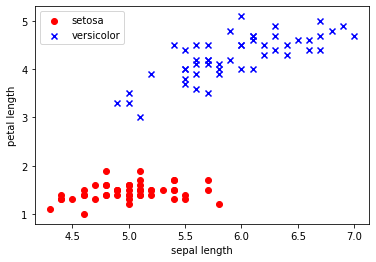

In [ ]:
plt.scatter(features[:50, 0], features[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(features[50:100, 0], features[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

5. **학습 데이터셋(Train Dataset)과 시험 데이터셋(Test Dataset)으로 나누어(Split)줍니다.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

6. **신경망 모델을 구축하고 컴파일(complie)한 후 학습합니다.**

이번 예제에서는 단층, 즉 **은닉층 없이 출력층으로만** 모델을 구성할 예정입니다.<br/>
그렇다면 입력층은 어디에 있을까요? 그리고 입력층의 노드 개수는 몇 개가 될까요?

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# 위 코드와 동일한 역할을 수행하는 다른 코드입니다.
# 다른 사람의 코드를 보고 이해할 수 있도록 아래 방식에도 익숙해져 보도록 합시다.

# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

**`.complie`** 에서는 신경망에서 사용할 옵티마이저(**`optimizer`**), 손실 함수(**`loss`**), 지표(**`metrics`**)를 설정합니다.
> ❗️ ***'옵티마이저'와 '손실 함수'는 다음 강의에서 다시 나올 예정이니 오늘은 '이런 용어가 있다!'라는 것만 기억하고 넘어갑시다.***

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**`.fit`** 은 실제로 신경망 학습이 진행되는 부분입니다.<br/>
에포크(`epochs`)를 조정하면 학습 횟수를 조정할 수 있습니다.
> ❗️ ***에포크 역시 다음 강의에서 다시 나오기 때문에 오늘은 용어 자체만 기억하고 넘어갑시다.***

In [ ]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 5ms/step - loss: 1.0814 - accuracy: 0.5250
Epoch 2/30
3/3 [==============================] - 0s 4ms/step - loss: 1.0017 - accuracy: 0.5250
Epoch 3/30
3/3 [==============================] - 0s 4ms/step - loss: 0.9433 - accuracy: 0.5250
Epoch 4/30
3/3 [==============================] - 0s 4ms/step - loss: 0.8986 - accuracy: 0.5250
Epoch 5/30
3/3 [==============================] - 0s 4ms/step - loss: 0.8627 - accuracy: 0.5250
Epoch 6/30
3/3 [==============================] - 0s 4ms/step - loss: 0.8413 - accuracy: 0.5250
Epoch 7/30
3/3 [==============================] - 0s 4ms/step - loss: 0.8181 - accuracy: 0.5250
Epoch 8/30
3/3 [==============================] - 0s 4ms/step - loss: 0.8036 - accuracy: 0.5250
Epoch 9/30
3/3 [==============================] - 0s 4ms/step - loss: 0.7901 - accuracy: 0.5250
Epoch 10/30
3/3 [==============================] - 0s 4ms/step - loss: 0.7797 - accuracy: 0.5250
Epoch 11/30
3/3 [======================

7. **학습한 신경망 모델을 사용하여 평가합니다.**

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.6629 - accuracy: 0.4000 - 107ms/epoch - 107ms/step


[0.6628996133804321, 0.4000000059604645]

- ***강의를 듣고 다시 생각해봅시다.***

    붓꽃 데이터 예제 코드에서

    > ❓ 1. 입력층의 노드 수는 몇 개일까요? (Hint : 입력 데이터의 특성 수)<br/>
    > ❓ 2. **`Dense`** 층의 숫자는 왜 **1** 일까요? <br/>
    > ❓ 3. **`Dense`** 층의 **`activation`** 은 왜 **`sigmoid`** 로 해주었을까요? <br/>
    > ❓ 4. **`compile`** 이 있는 부분에서 **`loss`** 함수는 왜 **`binary_crossentropy`** 로 해준 것일까요?


### 손글씨 MNIST 예제



MNIST 손글씨 예제는 가장 기본적인 이미지 분류(Image Classification) 예제입니다.<br/>
사람이 **0-9까지 쓴 흑백 손글씨 숫자 이미지를 각 클래스로 분류**합니다.<br/>
데이터는 가로, 세로 28픽셀(pixels)로 구성된 정사각형 이미지입니다.

실제 데이터가 어떻게 생겼고 어떻게 분류되어야 할 지 이미지를 통해 알아보겠습니다.

<img src="https://abpaudel.com/assets/img/posts/mnist.png" width=500>

> ❓ ***그렇다면 MNIST 예제는 이진 분류, 다중 분류, 회귀 중 어디에 속할까요? <br/>
<font color="ff6f61">항상 문제를 풀기 전에 자신이 풀고자 하는 문제가 어디에 속하는 지 생각</font>해보도록 합시다.***

1. **먼저 필요한 패키지와 라이브러리를 불러옵니다.**

In [ ]:
import pandas as pd
import tensorflow as tf

2. **데이터셋을 불러온 후 학습 데이터셋(Train Dataset)과 시험 데이터셋(Test Dataset)으로 나누어(Split)주고 픽셀값을 정규화 하여줍니다.**

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


이미지 데이터에서는 정규화하는 과정이 중요합니다. 빼먹지 않도록 주의해주세요!

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

3. **레이블이 어떻게 구성되어 있는 지 확인해봅니다.**

    데이터의 레이블 구성 형태를 살펴봅니다.<br/>
    처음보는 데이터의 경우 데이터 자체를 디스플레이 하여 보면 도움이 됩니다.

In [ ]:
pd.unique(y_train)

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

4. **이제 본격적으로 신경망 모델을 구축해보겠습니다.**

이번 예제에서는 은닉층 1개의 은닉층과 1개의 출력층으로만 모델을 구성할 예정입니다.<br/>
그렇다면 입력층의 노드 수는 몇 개가 될까요?

In [ ]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(100, activation='relu'),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

In [ ]:
# 위 코드와 동일한 역할을 수행하는 다른 코드입니다.
# 다른 사람의 코드를 보고 이해할 수 있도록 아래 방식에도 익숙해져 보도록 합시다.

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

이전 예제에서는 `Flatten` 함수가 없었는데요. 해당 함수는 왜 사용되는 것일까요?



In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2757 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1268 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0681 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0537 - accuracy: 0.9831


5. **학습한 신경망 모델을 사용하여 평가합니다.**

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0902 - accuracy: 0.9710 - 540ms/epoch - 2ms/step


[0.09016263484954834, 0.9710000157356262]

- ***강의를 듣고 다시 생각해봅시다.***

    손글씨 MNIST 예제 코드에서

    > ❓ 1. 입력층의 노드 수는 몇 개일까요? (Hint : 입력 데이터의 특성 수)<br/>
    > ❓ 2. **`Flatten`** 은 어떤 역할을 할까요? <br/>
    > ❓ 3. 마지막 **`Dense`** 층의 숫자는 왜 **10** 일까요? <br/>
    > ❓ 4. 마지막 **`Dense`** 층의 **`activation`** 은 왜 **`softmax`** 로 해주었을까요? <br/>
    > ❓ 5. **`compile`** 이 있는 부분에서 **`loss`** 함수는 왜 **`sparse_categorical_crossentropy`** 로 해준 것일까요?
